In [157]:
import numpy as np  
from scipy.integrate import odeint 
from scipy.signal import StateSpace, lsim
import matplotlib.pyplot as plt  
import sympy as sp  

In [158]:
# Define constants and parameters

cf = 20552.72  # Heat capacitance of water in Joules/K
mf = 4.912 # Volume times density, pipes 2.5cm diameter, 8 meters long and 2 tanks (kg)
cb = 12288  # Heat capacitance of boiler in Joules/K
c2 = 1228.8  # Heat capacitance of radiator in Joules/K
r2 = 0.002  # Thermal resistance between steel radiator and room in K/W
a = 1.7  # Area of solar panel in m^2  
n = 0.15  # Efficiency of solar panel
rb = 10000000  # Resistor b whose power dissipation is heating water
r1 = 1000  # Other resistor
r = 150  # Parameter 1 for thermal resistance of room
r0 = 150  # Parameter 2 for thermal resistance of room
cr = 16800  # Heat capacitance of room
t0 = 30 # Temperature of environment
m = 75  # Mass of window
g = 9.81  # Gravity
w0 = 5  # Fluid flow of hydraulic system
ac = 1  # Area of piston
l = 1  # Length of window
t1 = 10 # Temperature of tank 1
phi = 997 # Density of water kg/m^3
w1 = 0 # Fluid flow from tank 1 m^3/s
rt = 5 # Fluid resistance from tank 2
at = 5 # Area of tank 2
rf0 = 20  # Fluid resistance from pipe
p0 = 14 # Outside pressure


# State 1: Boiler on, window closed


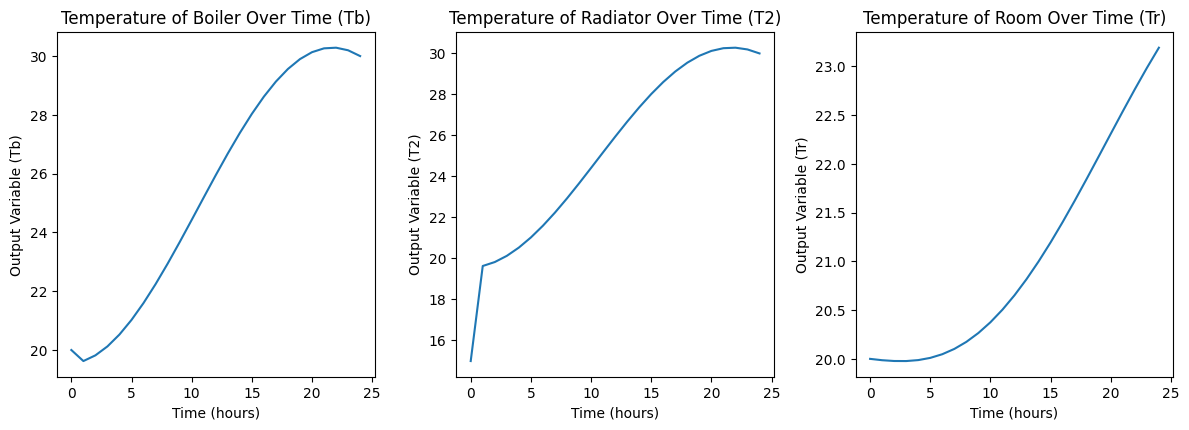

In [159]:
# Define the state equations
def system_of_odes(y, t):
    # Define your ODEs here
    tb, t2, tr = y
    dx1dt = ((input_signal(t) * rb * a * n) / ((r1 + rb) * cb)) - ((cf * mf * (tb - t2)) / cb)
    dx2dt = ((cf * mf * (tb - t2)) / c2 ) - ((t2 - tr) / (r2 * c2))
    dx3dt = ((t2 - tr) / (r2 * cr)) - ((tr - t0) / (cr * (r + r0)))
    
    return [dx1dt, dx2dt, dx3dt]

def input_signal(t):
    return (50000 * np.sin(t * (np.pi / 24)))
   # return 500

# Initial conditions
# tb, t2, tr
x0 = [20, 15, 20]

# Time span
t = np.arange(0, 25, 1)
# t = np.linspace(0, 10, 200)

# Solve the system of ODEs
solution = odeint(lambda y, t: system_of_odes(y, t), x0, t)

# Extract the results
tb, t2, tr = np.hsplit(solution, 3)

# Create a new figure for the plots
plt.figure(figsize=(12, 8))

state_variable_name = ['Temperature of Boiler Over Time', 'Temperature of Radiator Over Time', 'Temperature of Room Over Time']
state_variable = [' (Tb)', ' (T2)', ' (Tr)']
# Loop through each variable
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.plot(t, solution[:, i])
    plt.xlabel('Time (hours)')
    plt.ylabel(f'Output Variable' + state_variable[i])
    plt.title(state_variable_name[i] + state_variable[i])

plt.tight_layout()
plt.show()




# State 2: Boiler on, window open

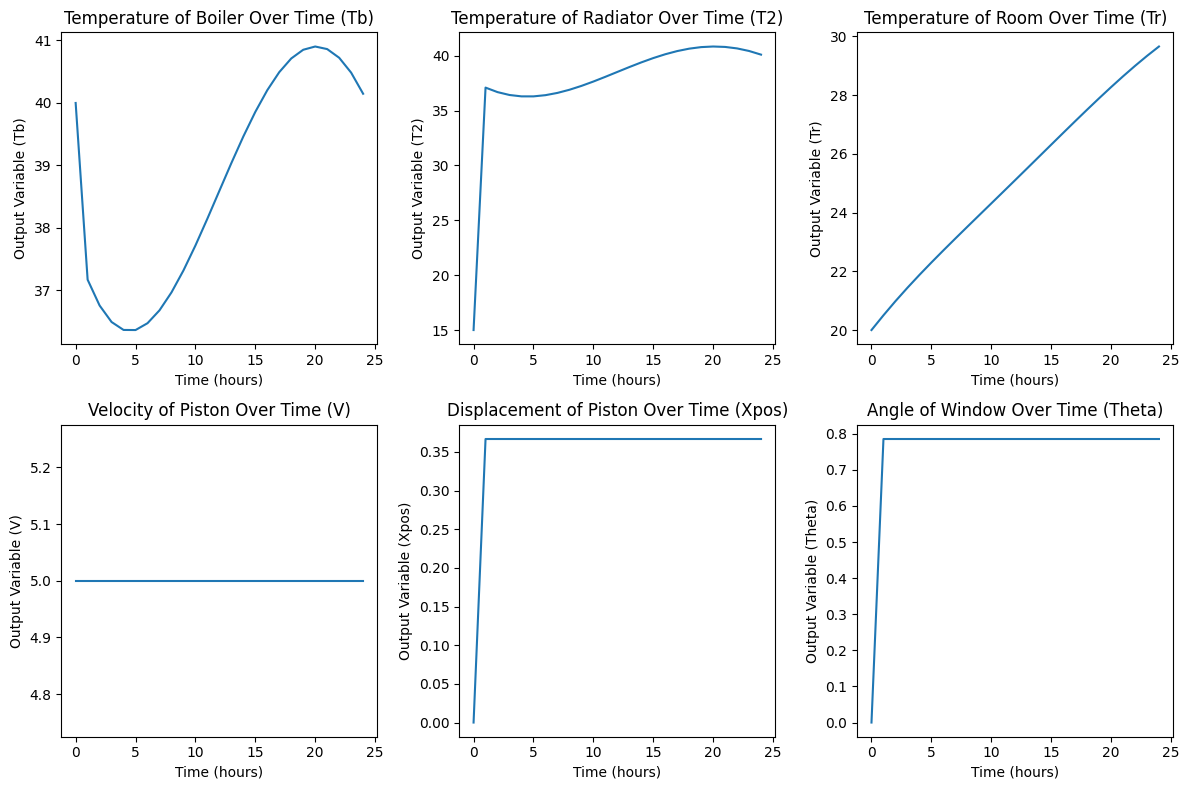

In [160]:
# Define the state equations
def system_of_odes(y, t):
    # Define your ODEs here
    tb, t2, tr, v, x, theta = y
    dx1dt = ((input_signal(t) * rb * a * n) / ((r1 + rb) * cb)) - ((cf * mf * (tb - t2)) / cb)
    dx2dt = ((cf * mf * (tb - t2)) / c2 ) - ((t2 - tr) / (r2 * c2))
    dx3dt = ((t2 - tr) / (r2 * cr)) - ((tr - t0) / (cr * (r * (1 - np.sin(2 * theta)) + r0)))
    dx4dt = 0
    if theta < 0:
        dx5dt = 0
        dx6dt = 0
        theta = 0
    elif theta >= np.pi / 4:
        dx5dt = 0
        dx6dt = 0
        theta = np.pi / 4
    else:
        dx5dt = w0 / ac
        dx6dt = (4 * v * np.sin(((np.pi / 2) - theta) / 2)) / l
        # dx6dt = np.pi/500  
    
    return [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt]

def input_signal(t):
    return (50000 * np.sin(t * (np.pi / 24)))
   # return 500

# Initial conditions
# tb, t2, tr, v, x, theta
x0 = [40, 15, 20, w0/ac, 0, 0]

# Time span
t = np.arange(0, 25, 1)
# t = np.linspace(0, 10, 200)

# Solve the system of ODEs
solution = odeint(lambda y, t: system_of_odes(y, t), x0, t)

# Extract the results
tb, t2, tr, v, xpos, theta = np.hsplit(solution, 6)

# Create a new figure for the plots
plt.figure(figsize=(12, 8))

state_variable_name = ['Temperature of Boiler Over Time', 'Temperature of Radiator Over Time', 'Temperature of Room Over Time', 'Velocity of Piston Over Time', 'Displacement of Piston Over Time', 'Angle of Window Over Time']
state_variable = [' (Tb)', ' (T2)', ' (Tr)', ' (V)', ' (Xpos)', ' (Theta)']
# Loop through each variable
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.plot(t, solution[:, i])
    plt.xlabel('Time (hours)')
    plt.ylabel(f'Output Variable' + state_variable[i])
    plt.title(state_variable_name[i] + state_variable[i])

plt.tight_layout()
plt.show()




# State 3: Cooling on, window closed

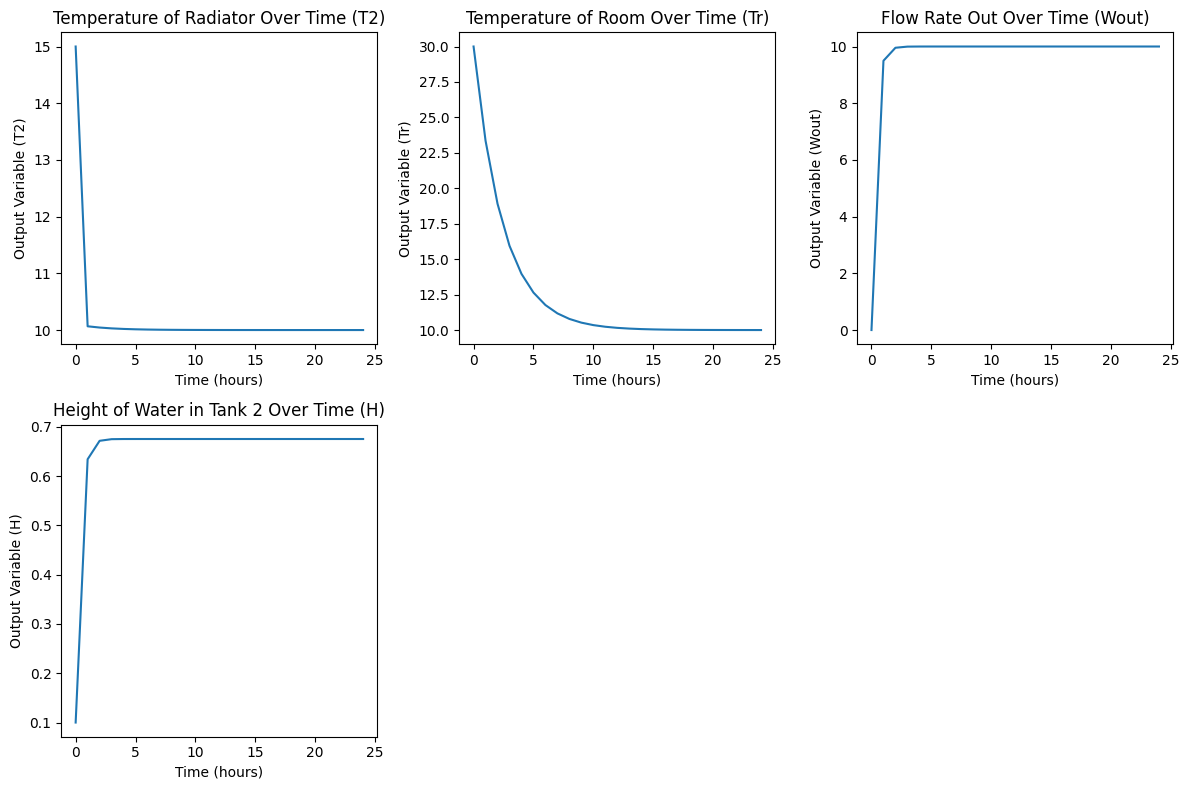

In [161]:
# Define the state equations
def system_of_odes(y, t):
    # Define your ODEs here
    t2, tr, wout, h = y
    w1 = 10
    dx1dt = ((cf * mf * (t1 - t2)) / c2 ) - ((t2 - tr) / (r2 * c2))
    dx2dt = (t2-tr)/(c2*r2) + (tr - t0) / (cr * (r + r0))
    if h < 1e-6:
        h = 0
        dx3dt = 0
        dx4dt = 0
    else:
        dx3dt = (np.sqrt(phi*g)*(w1 - wout))/(2*rt*np.sqrt(h)*at)
        dx4dt = (w1 - wout)/at
    
    return [dx1dt, dx2dt, dx3dt, dx4dt]


# Initial conditions
# t2, tr, wout, h
x0 = [15, 30, 0, 0.1]

# Time span
t = np.arange(0, 25, 1)
# t = np.linspace(0, 10, 200)

# Solve the system of ODEs
solution = odeint(system_of_odes, x0, t)

# Extract the results
t2, tr, wout, h = np.hsplit(solution, 4)

# Create a new figure for the plots
plt.figure(figsize=(12, 8))

state_variable_name = ['Temperature of Radiator Over Time', 'Temperature of Room Over Time', 'Flow Rate Out Over Time', 'Height of Water in Tank 2 Over Time']
state_variable = [' (T2)', ' (Tr)', ' (Wout)', ' (H)']
# Loop through each variable
for i in range(4):
    plt.subplot(2, 3, i + 1)
    plt.plot(t, solution[:, i])
    plt.xlabel('Time (hours)')
    plt.ylabel(f'Output Variable' + state_variable[i])
    plt.title(state_variable_name[i] + state_variable[i])

plt.tight_layout()
plt.show()


# State 4: Cooling on, window open


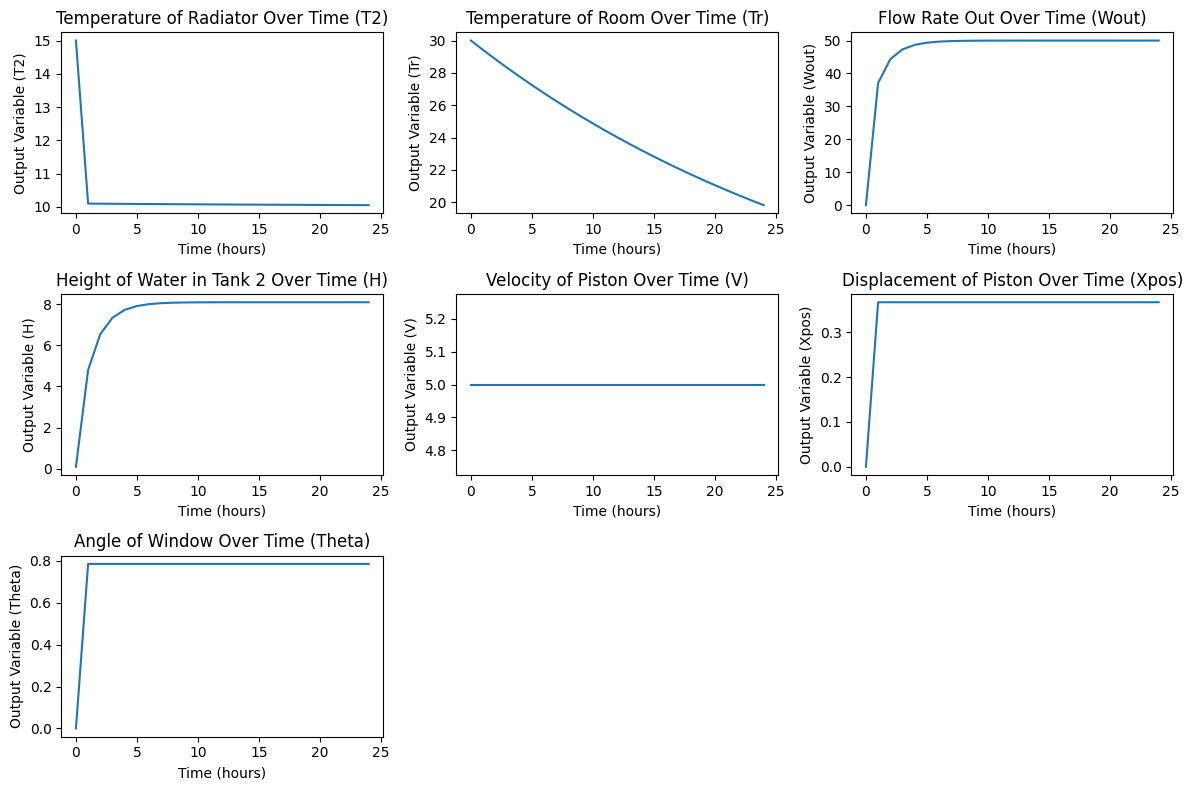

In [162]:
# Define the state equations
def system_of_odes(y, t):
    # Define your ODEs here
    t2, tr, wout, h, v, x, theta  = y
    w1 = 50
    dx1dt = ((cf * mf * (t1 - t2)) / c2 ) - ((t2 - tr) / (r2 * c2))
    dx2dt = ((t2 - tr) / (r2 * cr)) - ((tr - t0) / (cr * (r * (1 - np.sin(2 * theta)) + r0)))
    if h > 0:
        dx3dt = (np.sqrt(phi*g)*(w1 - wout))/(2*rt*np.sqrt(h)*at)
        dx4dt = (w1 - wout)/at
    else:
        h = 0
        dx3dt = 0
        dx4dt = 0
    dx5dt = 0
    if theta < 0:
        dx6dt = 0
        dx7dt = 0
        theta = 0
        v = 0
    elif theta >= np.pi / 4:
        dx6dt = 0
        dx7dt = 0
        theta = np.pi / 4
        v = 0
    else:
        dx6dt = w0 / ac
        dx7dt = (4 * v * np.sin(((np.pi / 2) - theta) / 2)) / l
    return [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt, dx7dt]



# Initial conditions
# t2, tr, wout, h, v, x, theta 
x0 = [15, 30, 0, 0.1, w0/ac, 0, 0]

# Time span
t = np.arange(0, 25, 1)
# t = np.linspace(0, 10, 200)

# Solve the system of ODEs
solution = odeint(lambda y, t: system_of_odes(y, t), x0, t)

# Extract the results
t2, tr, wout, h, v, x, theta = np.hsplit(solution, 7)

# Create a new figure for the plots
plt.figure(figsize=(12, 8))

state_variable_name = ['Temperature of Radiator Over Time', 'Temperature of Room Over Time', 'Flow Rate Out Over Time', 'Height of Water in Tank 2 Over Time',  'Velocity of Piston Over Time', 'Displacement of Piston Over Time', 'Angle of Window Over Time']
state_variable = [' (T2)', ' (Tr)', ' (Wout)', ' (H)', ' (V)', ' (Xpos)', ' (Theta)']

# Loop through each variable
for i in range(7):
    plt.subplot(3, 3, i + 1)
    plt.plot(t, solution[:, i])
    plt.xlabel('Time (hours)')
    plt.ylabel(f'Output Variable' + state_variable[i])
    plt.title(state_variable_name[i] + state_variable[i])

plt.tight_layout()
plt.show()




# Modelling window closing

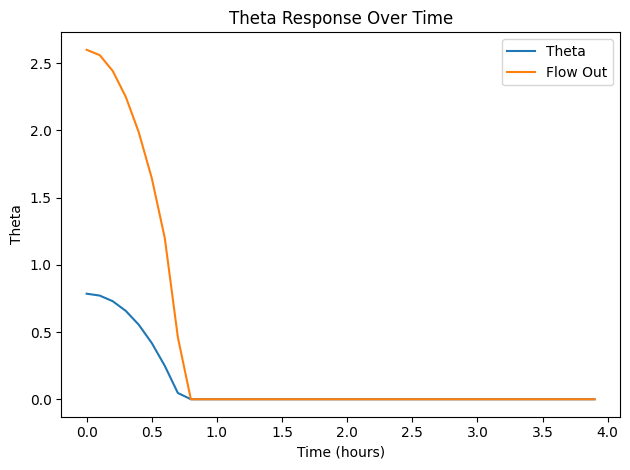

In [163]:
def dtheta(y, t):
    v, theta = y
    dv = -((2*m*g*np.sin(theta)/(np.sin(((np.pi/2)-theta)/2)))-p0)/(m*ac*rf0)
    dtheta = (4 * (v) * np.sin(((np.pi / 2) - theta) / 2)) / l
    if theta <= 0:
        dv = 0
        theta = 0
        dtheta = 0
    return [dv, dtheta]

x0 = [0 , np.pi/4]

# Time span
t = np.arange(0, 4, 0.1)


# Solve the system of ODEs
solution = odeint(dtheta, x0, t)

wflowout = []

for x in solution[ :, 1]:
    p = (2*m*g*np.sin(x))/(ac*np.sin((np.pi/2 - x)/2))
    if p >= p0:
        wflowout.append((1/rf0)*np.sqrt( p - p0)) 
    else:
        wflowout.append(0) 

plt.plot(t, solution[:, 1], label='Theta')
plt.plot(t, wflowout, label='Flow Out')
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel(f'Theta')
plt.title(f'Theta Response Over Time')
plt.tight_layout()
plt.show()

# Hybrid System Initializing


In [164]:
# Regular system

r0 = 1500  # Parameter 2 for thermal resistance of room
cr = 19000 # Heat capacitance of room
t0 = 15 # Temperature of environment

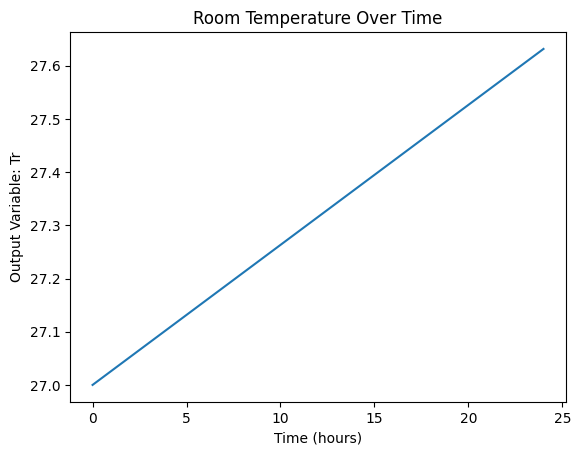

In [165]:
# Define the state equations
def system_of_odes(y, t):
    # Define your ODEs here
    tr = y[0]
    dx1dt = (500/cr) - ((tr - t0) / (cr * r0))
    return np.array([dx1dt])


# Initial conditions
# tr
x0 = np.array([27]) 

# Time span
t = np.arange(0, 25, 1)
# t = np.linspace(0, 10, 200)

# Solve the system of ODEs
solution = odeint(lambda y, t: system_of_odes(y, t), x0, t)


plt.plot(t, solution)
plt.xlabel('Time (hours)')
plt.ylabel(f'Output Variable: Tr')
plt.title('Room Temperature Over Time')
plt.show()




# Electric Machine Probabilty Mode Switching

In [166]:
# Modeling eletrical machine
import random

def machine_mode(mode):
    new_mode = 0
    if mode == 1:
        random_integer = random.randint(1, 2)
        if random_integer == 1:
            new_mode = 1
        else:
            new_mode = 2
    elif mode == 2:
        random_integer = random.randint(1, 5)
        #print('Note ', mode)
        if random_integer in (1, 2):
            new_mode = 1
        elif random_integer in (3, 4):
            new_mode = 2
        else:
            new_mode = 3
    else:
        random_integer = random.randint(1, 3)
        if random_integer == 1:
            new_mode = 3
        else:
            new_mode = 2
    return new_mode

init_mode = 2

# x = 0
# while x < 24:
#     check = init_mode
#     init_mode = machine_mode(check)
#     print(init_mode)
#     x += 1
        


# Hybrid System

0 : Triggering heating (boiler)
1 : Triggering heating (boiler)
2 : Triggering heating (boiler)
3 : Triggering heating (boiler)
4 : Triggering heating (boiler)
5 : Triggering heating (boiler)
6 : Triggering heating (boiler)
7 : Triggering heating (boiler)
8 : Triggering heating (boiler)
9 : Triggering heating (boiler)
10 : Triggering heating (boiler)
11 : Triggering heating (boiler)
12 : Triggering heating (boiler)
13 : Triggering heating (boiler)
14 : Triggering heating (boiler)
15 : Triggering heating (boiler)
16 : Triggering heating (boiler)
17 : Triggering heating (boiler)
18 : Triggering heating (boiler)
19 : Window closed
20 : Window closed
21 : Window closed
22 : Window closed
23 : Window closed
24 : Window closed
[3, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 3, 3, 2, 1]


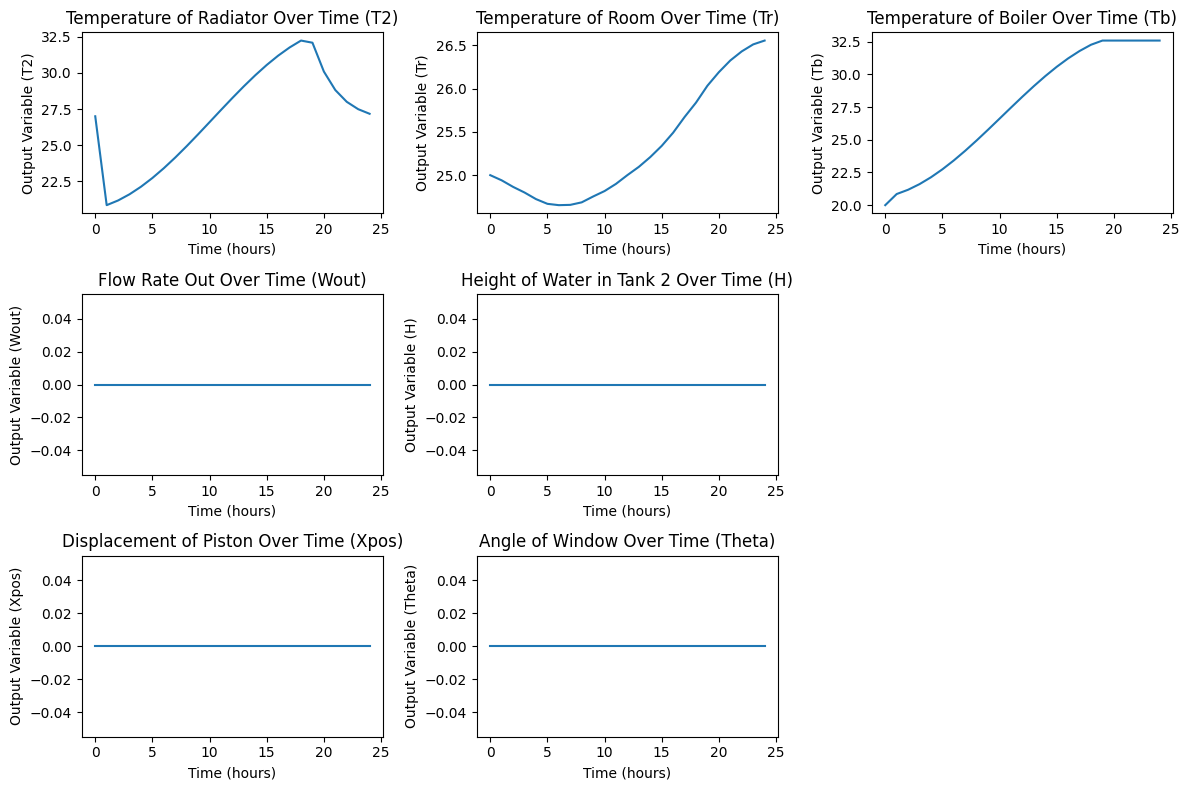

In [167]:
# Setting global variables
prev_time = -1
init_mode = 2
heat = 500
mode_list = []

# Define the state equations
def system_of_odes(y, t):

    global mode_list
    global init_mode
    global heat
    # Declaring variables
    t2, tr, tb, wout, h, v, x, theta  = y
    
    # Changes electrical machines mode every hour
    if check_hour(t) and int(t) > prev_time:
        mode = machine_mode(init_mode)
        if mode == 1:
            heat = 0
        elif mode == 2:
            heat = 500
        else:
            heat = 1000
        init_mode = mode
        mode_list.append(mode)

    #Setting flow rate out of tank 1
    w1 = 0

    # Window closed, boiler on
    if tr < 26:
        if theta > 0:
            dx1dt = 0
            dx2dt = 0
            dx3dt = 0
            dx6dt = -(rf0*ac*ac*v/m + 2*g*np.sin(theta)/(np.sin(((np.pi/2)-theta))/2) - rf0*v/m)
            dx7dt = -(2*m*g*np.sin(theta)/(np.sin(((np.pi/2)-theta))/2) - p0)/(m*ac*rf0)
            dx8dt = (4 * v * np.sin(((np.pi / 2) - theta) / 2)) / l
        else: 
            if check_hour(t) and int(t) > prev_time:
                print(int(t), ": Triggering heating (boiler)")
            dx1dt = ((cf*mf*(tb-t2))/c2) - ((t2-tr)/(r2*c2)) 
            dx2dt = (heat/cr) + ((t2 - tr) / (r2 * cr)) - ((tr - t0) / (cr * (r0 + r)))
            dx3dt = ((photovoltaic(t) * rb * a * n) / ((r1 + rb) * cb)) - ((cf * mf * (tb - t2)) / cb)
            dx6dt = 0
            dx7dt = 0
            dx8dt = 0

    # Window closed, flow of water disabled
    elif tr >= 26 and tr < 27:
        if check_hour(t) and int(t) > prev_time:
            print(int(t), ": Window closed")
        dx1dt = (tr-t2)/(c2*r2)
        dx2dt = (heat/cr) + ((t2 - tr) / (r2 * cr))
        dx3dt = 0
        if theta > 0:
            dx6dt = -(rf0*ac*ac*v/m + 2*g*np.sin(theta)/(np.sin(((np.pi/2)-theta))/2) - rf0*v/m)
            dx7dt = -(2*m*g*np.sin(theta)/(np.sin(((np.pi/2)-theta))/2) - p0)/(m*ac*rf0)
            dx8dt = (4 * v * np.sin(((np.pi / 2) - theta) / 2)) / l
        else:
            theta = 0
            dx6dt = 0
            dx7dt = 0
            dx8dt = 0

    # Window opened, flow of water disabled
    elif tr >= 27 and tr < 28:
        if check_hour(t) and int(t) > prev_time:
            print(int(t), ": Window Opened")
        dx1dt = (tr-t2)/(c2*r2)
        dx2dt =(heat/cr) + ((t2 - tr) / (r2 * cr))  - ((tr - t0) / (cr * (r * (1 - np.sin(2 * theta)) + r0)))
        dx3dt = 0
        if theta < np.pi/4:
            dx6dt = 0
            dx7dt = w0/ac
            dx8dt = (4 * (w0/ac) * np.sin(((np.pi / 2) - theta) / 2)) / l
        else:
            theta = np.pi/4
            dx6dt = 0
            dx7dt = 0
            dx8dt = 0

    # Window closed, cooler on
    elif tr >= 28:
        if check_hour(t) and int(t) > prev_time:
            print(int(t), ": Triggering cooling")
        if theta > 0:
            dx1dt = 0
            dx2dt = 0
            dx3dt = 0
            dx6dt = -(rf0*ac*ac*v/m + 2*g*np.sin(theta)/(np.sin(((np.pi/2)-theta))/2) - rf0*v/m)
            dx7dt = -(2*m*g*np.sin(theta)/(np.sin(((np.pi/2)-theta))/2) - p0)/(m*ac*rf0)
            dx8dt = (4 * v * np.sin(((np.pi / 2) - theta) / 2)) / l
        else: 
            w1 = 100
            theta = 0
            dx1dt = cf * mf * (t1 - t2) / c2  - ((t2 - tr) / (r2 * c2))
            dx2dt = (heat/cr) + (t2-tr)/(c2*r2) - (tr - t0) / (cr * (r + r0))
            dx3dt = 0
            dx6dt = 0
            dx7dt = 0
            dx8dt = 0

    if h < 0:
        h = 0
        dx4dt = 0
        dx5dt = 0
    else: 
        dx4dt = (np.sqrt(phi*g)*(w1 - wout))/(2*rt*np.sqrt(h+1e-3)*at)
        dx5dt = (w1 - wout)/at
    
    if check_hour(t) and int(t) > prev_time:
        change_time(t)

    return [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt, dx7dt, dx8dt]

def photovoltaic(t):
    return (50000 * np.sin(t * (np.pi / 24)))

def check_hour(t):
    global prev_time
    if int(t) != prev_time:
        return True
    else:
        return False
    
def change_time(t):
     global prev_time
     prev_time = int(t)


# Initial conditions
# t2, tr, tb, wout, h, v, x, theta

# Room temp @30 
#x0 = [27, 30, 20, 0, 0, w0/ac, 0, 0]

# Room temp @27
#x0 = [27, 27, 20, 0, 0, 0, 0, 0]

# Room temp @25
x0 = [27, 25, 20, 0, 0, 0, 0, 0]

# Time span
t = np.arange(0, 25, 1)
#t = np.arange(0, 10, 1)
#t = np.arange(0, 2, 0.5)


# Solve the system of ODEs
solution = odeint(system_of_odes, x0, t)

# Extract the results
t2, tr, tb, wout, h, v, x, theta = np.hsplit(solution, 8)

print(mode_list)
# Create a new figure for the plots
plt.figure(figsize=(12, 8))

state_variable_name = ['Temperature of Radiator Over Time', 'Temperature of Room Over Time', 'Temperature of Boiler Over Time', 'Flow Rate Out Over Time', 'Height of Water in Tank 2 Over Time',  'Velocity of Piston Over Time', 'Displacement of Piston Over Time', 'Angle of Window Over Time']
state_variable = [' (T2)', ' (Tr)', ' (Tb)', ' (Wout)', ' (H)', ' (V)', ' (Xpos)', ' (Theta)']

# Loop through each variable
for i in range(8):
    if i != 5: 
        plt.subplot(3, 3, i + 1)
        plt.plot(t, solution[:, i])
        plt.xlabel('Time (hours)')
        plt.ylabel(f'Output Variable' + state_variable[i])
        plt.title(state_variable_name[i] + state_variable[i])

plt.tight_layout()
plt.show()


In [168]:
# To simulate extreme conditions. Note that to use these conditions, the time scale has be lessened because all the values are changing rapidly and at different scales which overloads the ODE solver
r0 = 1500  # Parameter 2 for thermal resistance of room
cr = 3000 # Heat capacitance of room
t0 = 10 # Temperature of environment